**Bill authentication using Random Forest Classifier**

Step 01: Importing the dependencies

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Step 02: Dataset analysis

In [2]:
#loading the data to a pandas dataframe
df = pd.read_csv('bill_authentication.csv')

In [4]:
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [7]:
#checking the number of rows and colomns
df.shape

(1372, 5)

In [8]:
#statistical measures of the dataset
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [9]:
#checking the null values in the dataset
df.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

Step 03: Understanding the correlation between the features

In [11]:
correlation = df.corr()

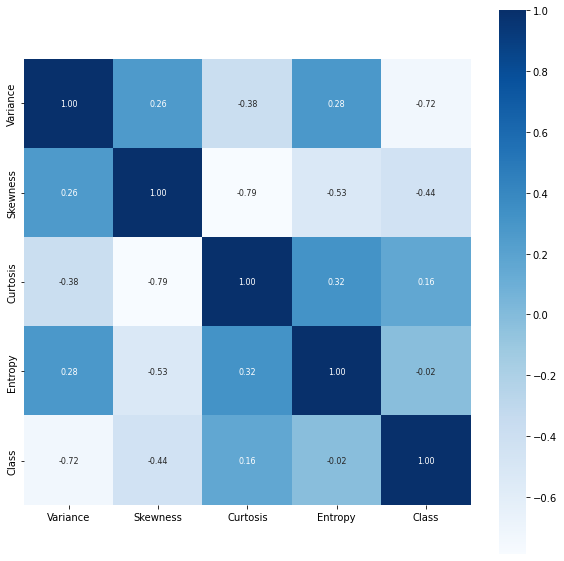

In [12]:
#constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':8}, cmap='Blues')

Step 04: Train and test split

In [14]:
X = df.iloc[:,0:4].values
Y = df.iloc[:, 4].values

In [15]:
print(X)
print(Y)

[[  3.6216    8.6661   -2.8073   -0.44699]
 [  4.5459    8.1674   -2.4586   -1.4621 ]
 [  3.866    -2.6383    1.9242    0.10645]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771 ]
 [ -3.5637   -8.3827   12.393    -1.2823 ]
 [ -2.5419   -0.65804   2.6842    1.1952 ]]
[0 0 0 ... 1 1 1]


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [17]:
X.shape, X_train.shape, X_test.shape

((1372, 4), (1097, 4), (275, 4))

In [19]:
#standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Step 05: Model Training and Evaluation

In [20]:
#loading the Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=20, random_state=0)

In [21]:
#training the model with X_train and Y_train
classifier.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

Step 06: Model Evaluation

In [22]:
# accuracy for prediction on training data
training_data_prediction = classifier.predict(X_train)

In [24]:
print(confusion_matrix(Y_train, training_data_prediction))
print(classification_report(Y_train, training_data_prediction))
print(accuracy_score(Y_train, training_data_prediction))

[[605   0]
 [  0 492]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       605
           1       1.00      1.00      1.00       492

    accuracy                           1.00      1097
   macro avg       1.00      1.00      1.00      1097
weighted avg       1.00      1.00      1.00      1097

1.0


In [25]:
# accuracy for prediction on testing data
testing_data_prediction = classifier.predict(X_test)

In [26]:
print(confusion_matrix(Y_test, testing_data_prediction))
print(classification_report(Y_test, testing_data_prediction))
print(accuracy_score(Y_test, testing_data_prediction))

[[153   4]
 [  0 118]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       157
           1       0.97      1.00      0.98       118

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

0.9854545454545455
